In [1]:
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'C:\Users\berid\OneDrive\Desktop\mydata\analysis\cars.csv')

In [3]:
df.columns=df.columns.str.title().str.strip().str.replace(' ','')

In [4]:
df

,Make,Model,Year,EngineFuelType,EngineHp,EngineCylinders,TransmissionType,Driven_Wheels,NumberOfDoors,MarketCategory,VehicleSize,VehicleStyle,HighwayMpg,CityMpg,Popularity,Msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


# Find most common MarketCategory 

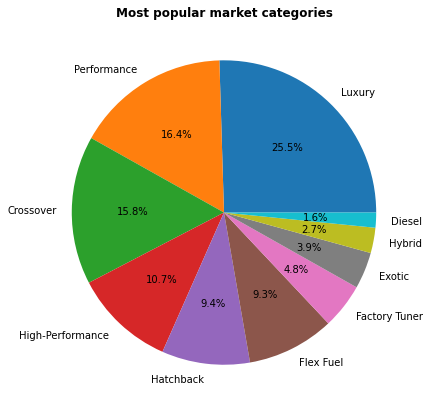

In [5]:
stacked=df['MarketCategory'].str.split(',',expand=True).stack().value_counts().reset_index(name='count')
plt.figure(figsize=(7,7))
plt.pie(stacked['count'],labels=stacked['index'],autopct='%.1f%%')
plt.title('Most popular market categories',fontweight='bold')
plt.show()

# Find most correlated features with MSRP 

In [6]:
df.corr()['Msrp'].sort_values(ascending=False)

Msrp               1.000000
EngineHp           0.662008
EngineCylinders    0.531312
Year               0.227590
Popularity        -0.048476
NumberOfDoors     -0.126635
CityMpg           -0.157676
HighwayMpg        -0.160043
Name: Msrp, dtype: float64

In [7]:
# features that most affect the car MSRP in a positive way, are Engine HP and Manufacturing year 

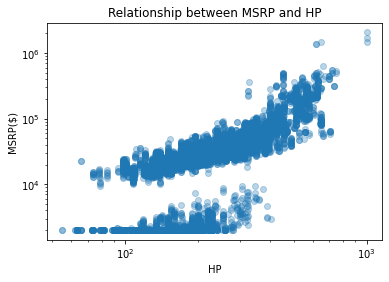

In [8]:
plt.scatter(df['EngineHp'],df['Msrp'],alpha=0.3)
plt.title('Relationship between MSRP and HP')
plt.xlabel('HP')
plt.ylabel('MSRP($)')
plt.xscale('log')
plt.yscale('log')

In [9]:
# seems there is a two groups of cars on the scatter plot. 
# For the first group(above) price rises if rises engine HP. 
# As for the second group(below), price dont neccessarily rises if rises car's HP.
# It might be cars manufactured in 90s that belong to this group. Some of these cars have high HP. As time went on, the MSRP subsided, but HP remained the same.
# Better way to visualize relationship beteen HP and MSRP would be 3D scatter plot, for which Year would be the 3rd dimensional(Z axis) value.

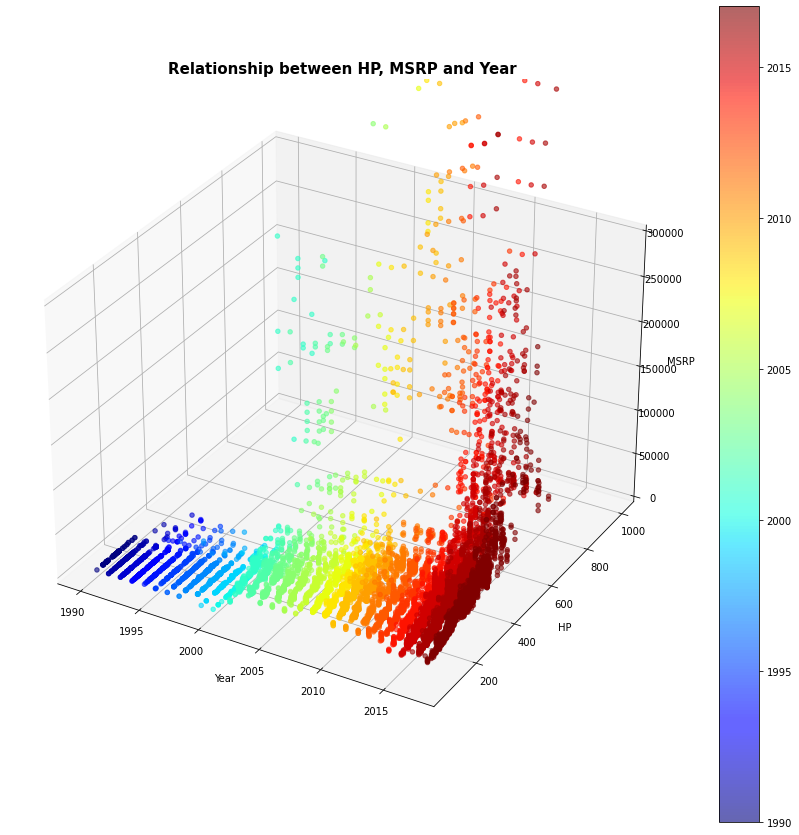

In [10]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(projection='3d')
scatter3D=ax.scatter(df['Year'],df['EngineHp'],df['Msrp'],alpha=.6,c=df['Year'],cmap='jet')
plt.colorbar(scatter3D)

ax.set_zlim(0,300000)

plt.title('Relationship between HP, MSRP and Year',size=15,fontweight='bold')
ax.set_xlabel('Year')
ax.set_ylabel('HP')
ax.set_zlabel('MSRP')

#ax.view_init(45, -160)

plt.show()


In [11]:
# as expected, there is one group of cars manufcatured in 90s(dark blue) for which MSRP don't rise in accordance with HP rise

# Price frequency distribution

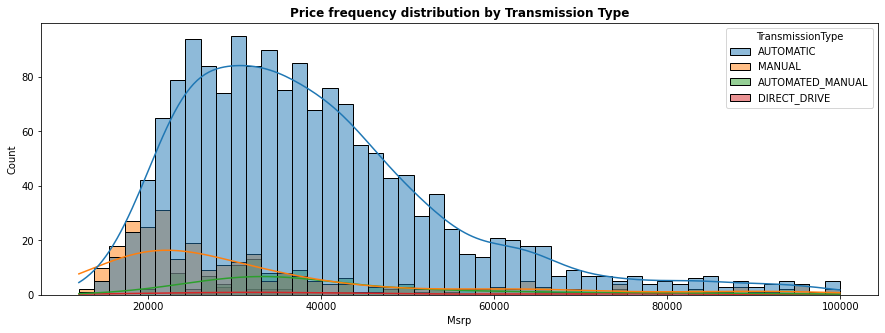

In [12]:
plt.figure(figsize=(15,5))
sns.histplot(data=df.query('Msrp<=1*10**5 and Year==2016'),x='Msrp',bins=50,hue='TransmissionType',kde=True)
plt.title('Price frequency distribution by Transmission Type',fontweight='bold')
plt.show()

# Plot Frequency distributions by MSRP and HP for each year 

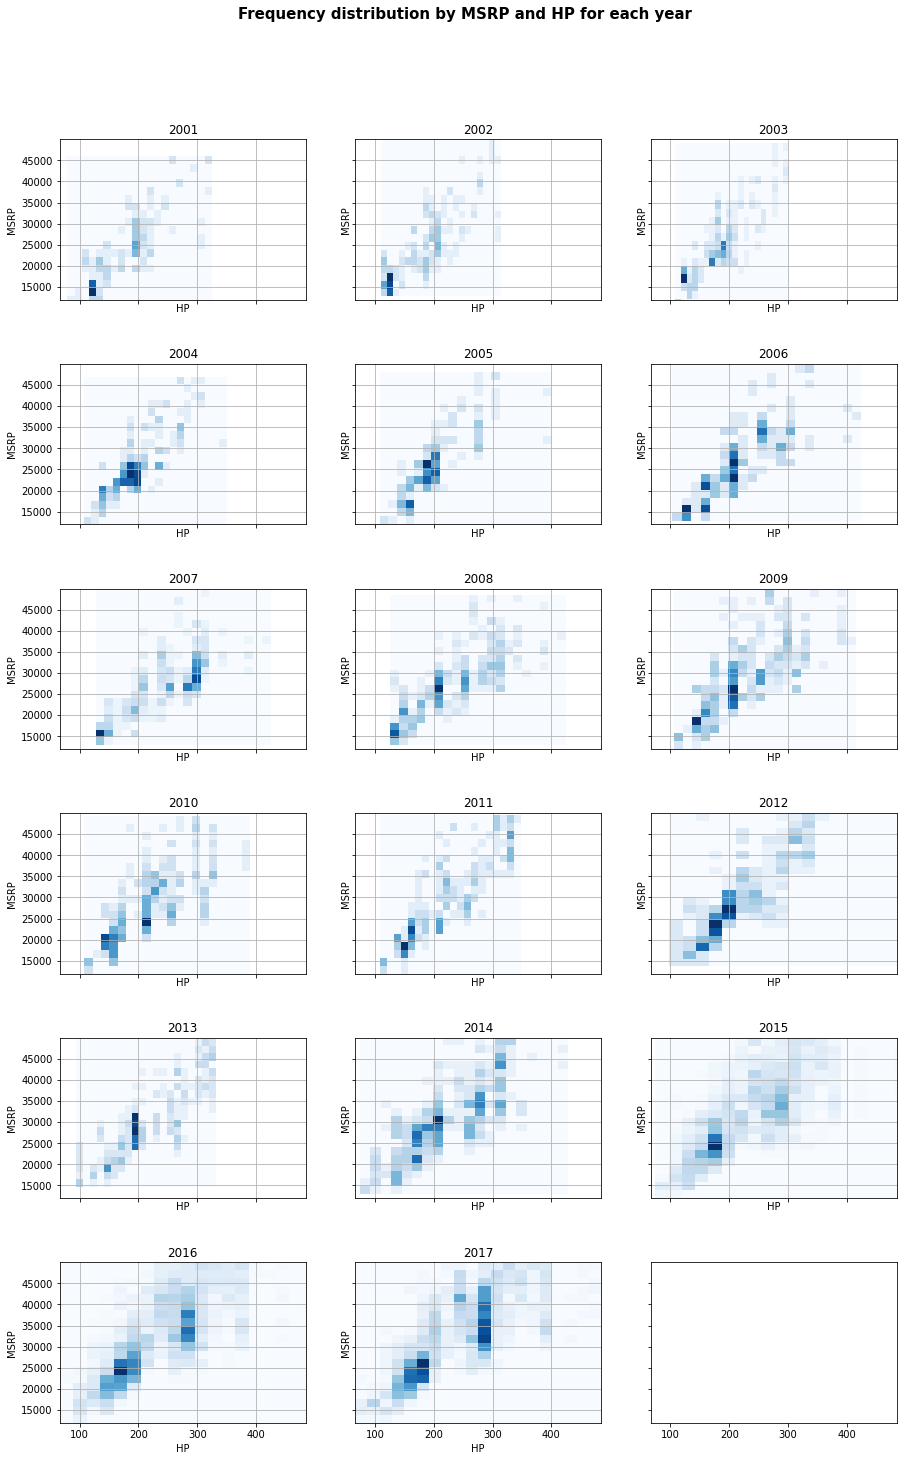

In [13]:
fig,axes=plt.subplots(6,3,figsize=(15,23),sharey=True,sharex=True)
for i,ax in zip(range(2001,2018),axes.ravel()):
    filtered=df.query('Year==@i and EngineHp.notna() and Msrp<=0.5*10**5')
    ax.hist2d(filtered['EngineHp'],filtered['Msrp'],bins=20,cmap='Blues')
    ax.set_xlabel('HP')
    ax.set_ylabel('MSRP')
    ax.set_title(i)
    ax.grid()
plt.subplots_adjust(hspace=0.4,top=0.9)
plt.suptitle('Frequency distribution by MSRP and HP for each year',size=15,fontweight='bold')
plt.show()